In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA 

In [3]:
# Data preparation

df_temp = pd.read_csv('Global_Temperature.csv', sep=';', index_col='Year')


In [4]:
df_temp

,Global_Temp
Year,
1880,-0.16
1881,-0.07
1882,-0.10
1883,-0.16
1884,-0.28
...,...
2016,1.01
2017,0.92
2018,0.85


In [5]:
temp = df_temp['Global_Temp'].values.reshape(-1,1)

In [6]:
temp

array([[-0.16],
       [-0.07],
       [-0.1 ],
       [-0.16],
       [-0.28],
       [-0.33],
       [-0.31],
       [-0.36],
       [-0.17],
       [-0.1 ],
       [-0.35],
       [-0.22],
       [-0.27],
       [-0.31],
       [-0.3 ],
       [-0.22],
       [-0.11],
       [-0.1 ],
       [-0.26],
       [-0.17],
       [-0.08],
       [-0.15],
       [-0.27],
       [-0.37],
       [-0.46],
       [-0.26],
       [-0.22],
       [-0.38],
       [-0.42],
       [-0.48],
       [-0.42],
       [-0.43],
       [-0.35],
       [-0.34],
       [-0.14],
       [-0.13],
       [-0.35],
       [-0.45],
       [-0.29],
       [-0.27],
       [-0.27],
       [-0.19],
       [-0.28],
       [-0.26],
       [-0.27],
       [-0.22],
       [-0.11],
       [-0.22],
       [-0.2 ],
       [-0.36],
       [-0.15],
       [-0.09],
       [-0.16],
       [-0.29],
       [-0.13],
       [-0.2 ],
       [-0.15],
       [-0.03],
       [ 0.  ],
       [-0.02],
       [ 0.13],
       [ 0.19],
       [

In [11]:
# %% generate time regressors

T = len(temp)
time = np.arange(1,T+1)/100 #line
time2= np.column_stack((time,time**2)) #quadratic
regressors = sm.add_constant(time2)

In [12]:
# %% build and fit the quadratic regression model

model_reg = sm.OLS(temp,regressors)
results_reg = model_reg.fit()

In [13]:
def plot_acf_pacf(data):
    
    # prepare the plot
    plt.rcParams.update({'font.size': 18})
    fig, axes = plt.subplots(2, 1, \
        figsize=(16,10), dpi= 100)
    plt.subplots_adjust(hspace=0.3)

    # ACF
    plot_acf(data, alpha=0.05, ax=axes[0],\
        title='Autocorrelation function (ACF)')
    axes[0].set_xlabel('Lag')
    axes[0].set_ylabel('Correlation')

    # PACF
    plot_pacf(data, alpha=0.05, ax=axes[1],\
        title='Partial Autocorrelation function (PACF)')
    axes[1].set_xlabel('Lag')
    axes[1].set_ylabel('Correlation')

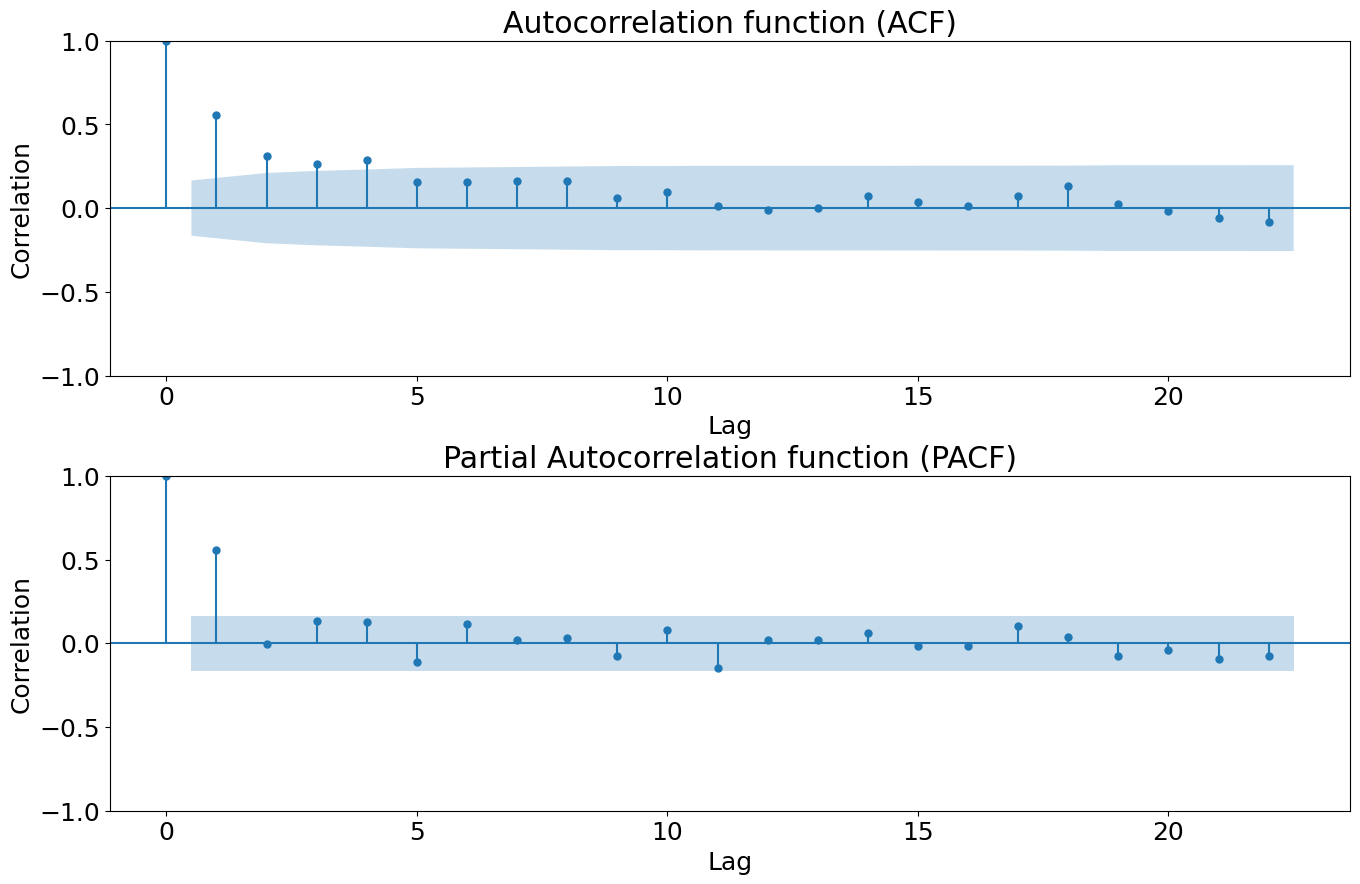

In [14]:
# %% plot ACF & PACF of the residuals of 
# the regression model
plot_acf_pacf(results_reg.resid)

In [16]:
# %% calculate arithmetic mean of the residuals
mean_residual = results_reg.resid.mean()

In [17]:
# %% define the data for ARMA as the difference 
# between the model residuals and the mean of
# these residuals
X = results_reg.resid-mean_residual

In [21]:
# %% build and fit an AR(1) model
order = (1,0,0) # (p, d, q) - d will later be discussed
model = ARIMA(endog=X,exog=None, trend='n', order = order,enforce_stationarity=True,enforce_invertibility=True)

m_ar1 = model.fit()

In [22]:
# %% build and fit a MA(4) model
order = (0,0,4) # (p, d, q) - d will later be discussed
model = ARIMA(endog=X,exog=None,trend='n',order = order,enforce_stationarity=True,enforce_invertibility=True)
m_ma4 = model.fit()

In [24]:
order = (1,0,4)
model = ARIMA(endog=X,exog=None,trend='n',order=order, enforce_stationarity=True,enforce_invertibility=True)
m_arma14 = model.fit()

In [30]:
print(m_ar1.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  141
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 128.865
Date:                Tue, 15 Oct 2024   AIC                           -253.730
Time:                        16:05:27   BIC                           -247.833
Sample:                             0   HQIC                          -251.333
                                - 141                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5604      0.067      8.341      0.000       0.429       0.692
sigma2         0.0094      0.001      7.021      0.000       0.007       0.012
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [28]:
print(m_ma4.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  141
Model:                 ARIMA(0, 0, 4)   Log Likelihood                 130.944
Date:                Tue, 15 Oct 2024   AIC                           -251.889
Time:                        16:05:19   BIC                           -237.145
Sample:                             0   HQIC                          -245.897
                                - 141                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5574      0.084      6.635      0.000       0.393       0.722
ma.L2          0.2417      0.095      2.535      0.011       0.055       0.429
ma.L3          0.1418      0.101      1.401      0.1

In [29]:
print(m_arma14.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  141
Model:                 ARIMA(1, 0, 4)   Log Likelihood                 132.063
Date:                Tue, 15 Oct 2024   AIC                           -252.126
Time:                        16:05:24   BIC                           -234.434
Sample:                             0   HQIC                          -244.937
                                - 141                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7661      0.184      4.154      0.000       0.405       1.128
ma.L1         -0.1984      0.192     -1.035      0.301      -0.574       0.177
ma.L2         -0.1987      0.131     -1.513      0.1

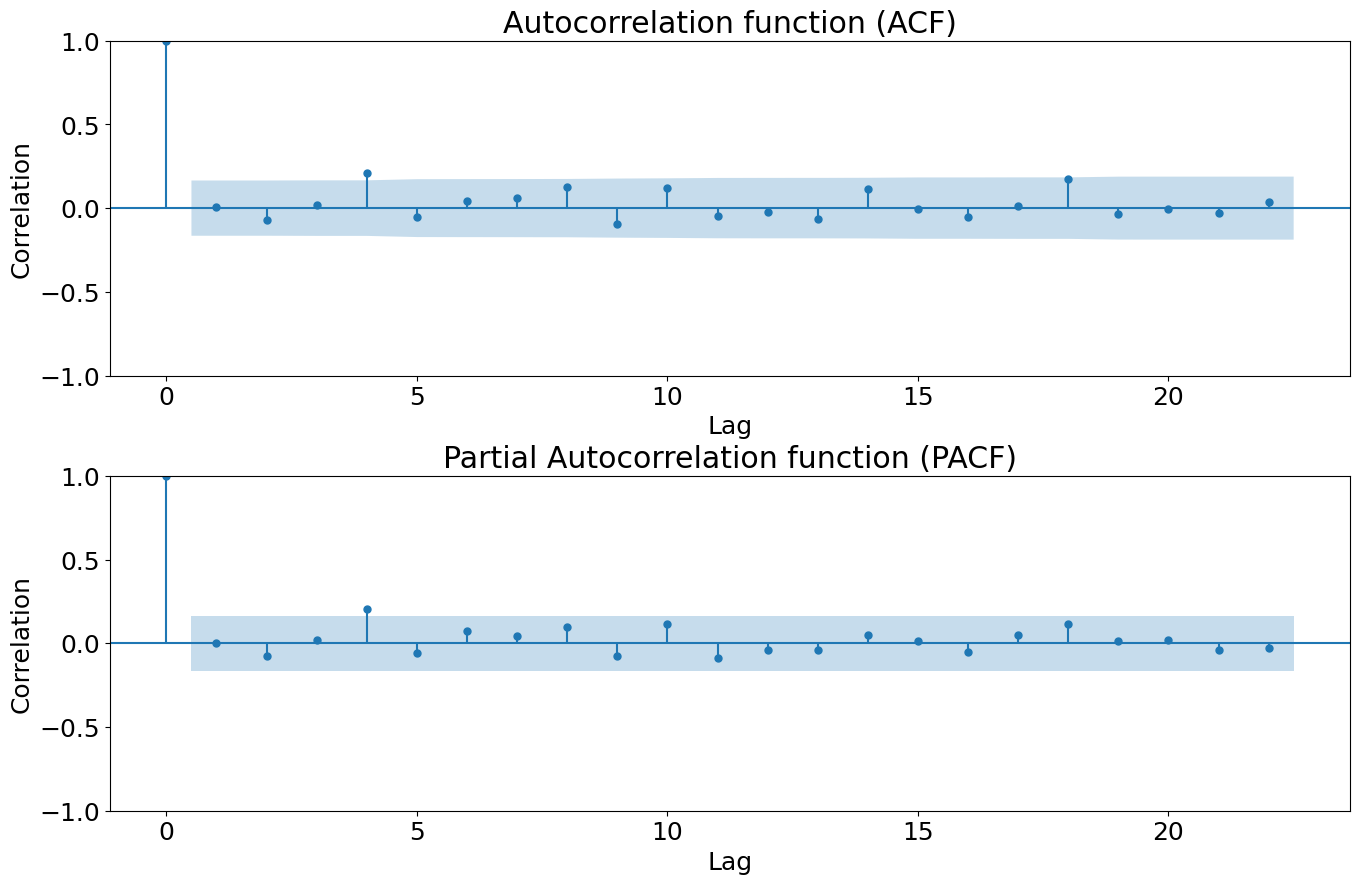

In [31]:
plot_acf_pacf(m_ar1.resid)

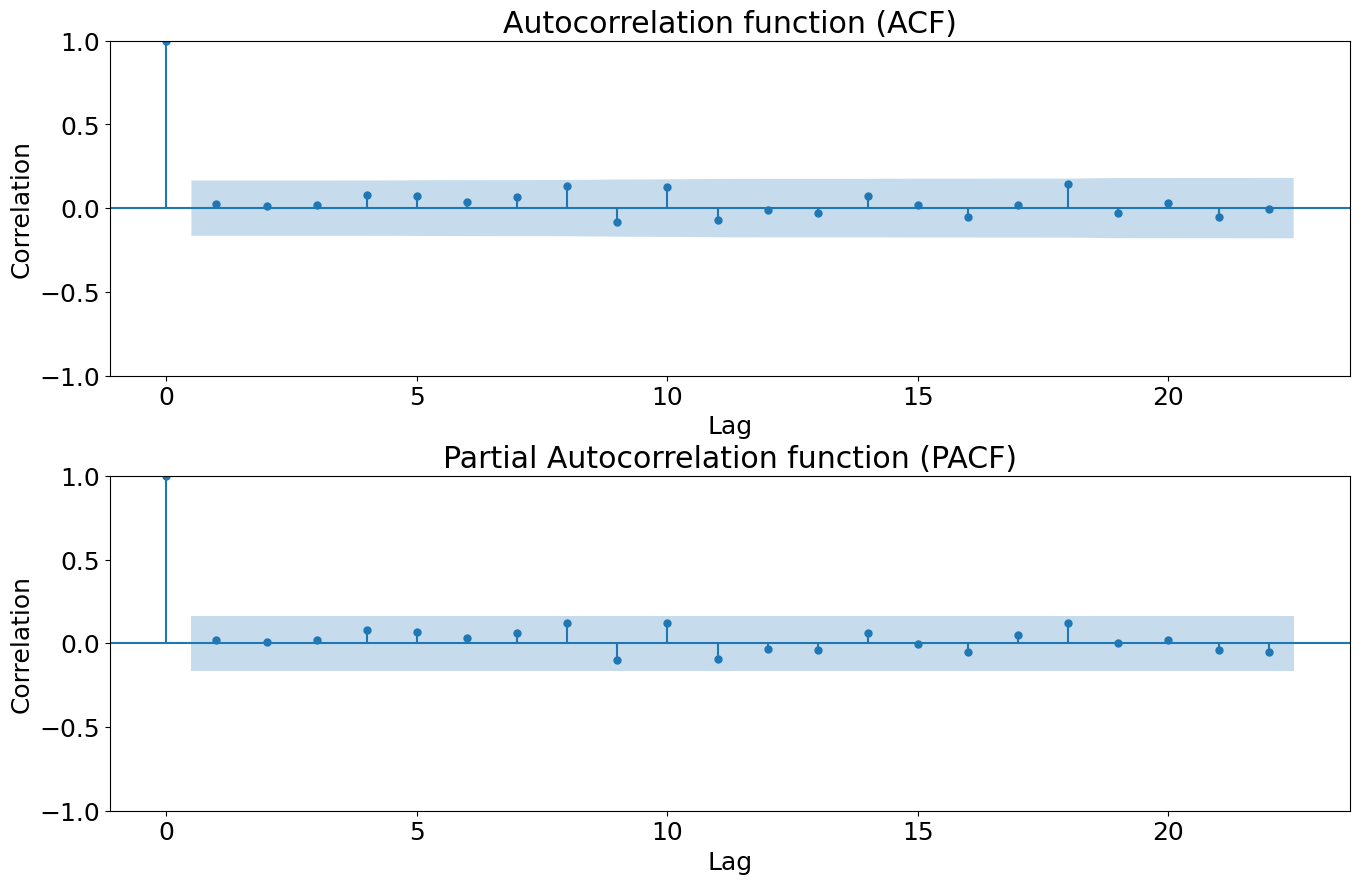

In [32]:
plot_acf_pacf(m_ma4.resid)

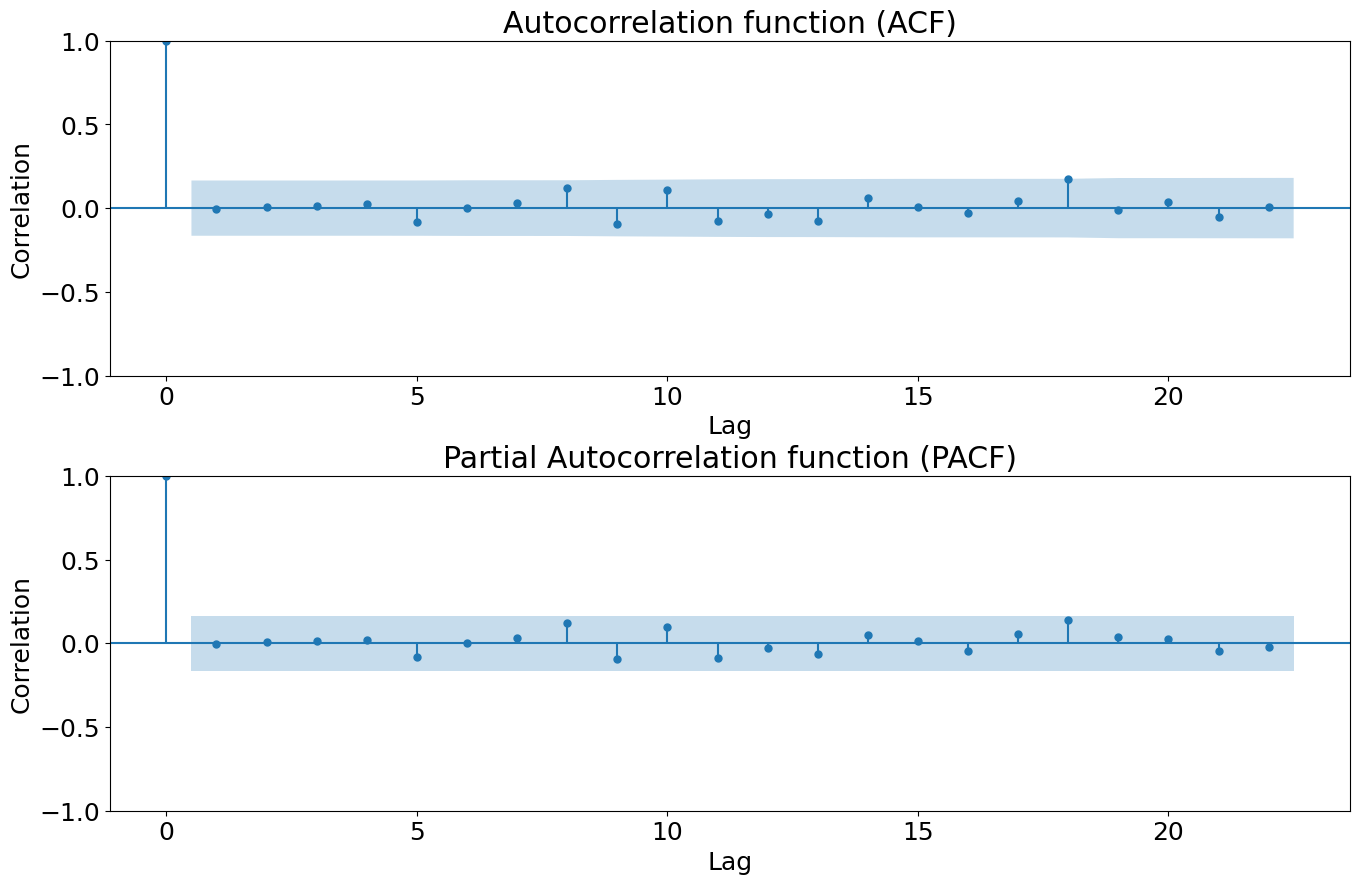

In [33]:
plot_acf_pacf(m_arma14.resid)

In [34]:
# %% define time steps to be forecasted into the future
steps=20

In [35]:
# %% define exogenous variables for the out of sample forecast
time_oos = np.arange(142,142+steps)/100
time2_oos = np.column_stack((time_oos,time_oos**2))
regressors_oos = sm.add_constant(time2_oos)

In [36]:
# %% get regression forecast
reg_component= results_reg.predict(exog=regressors_oos)

In [39]:
ar_component = m_ar1.forecast(steps=steps)

In [40]:
forecasted_temperatures = reg_component + ar_component

In [49]:
# %% add forecast to the original data
oos_index = pd.Index(np.arange(2021, 2021+steps))
all_index = df_temp.index.append(oos_index)
all_forecast = np.append(results_reg.fittedvalues,\
    forecasted_temperatures)

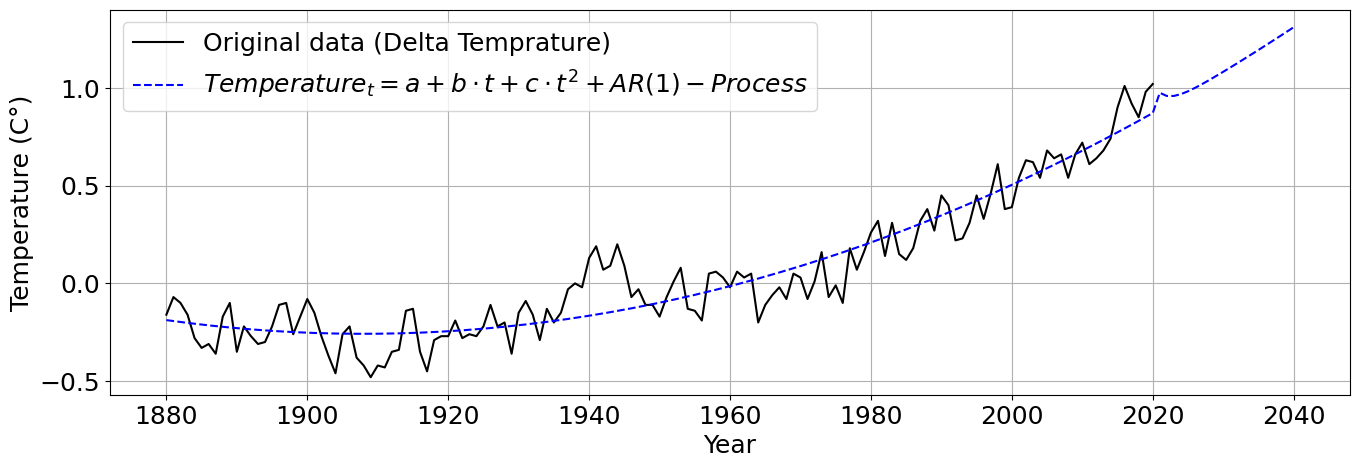

In [50]:
plt.figure(figsize=(16,5),dpi=100)

plt.plot(df_temp.index,df_temp['Global_Temp'], color='k', label='Original data (Delta Temprature)')

label = '$Temperature_{t}=a+b\cdot '
label += 't+c\cdot t^{2}+AR(1)-Process$'

plt.plot(all_index,all_forecast,'--',color = 'blue', label=label)

plt.gca().set(xlabel='Year', ylabel='Temperature (C°)')
plt.legend()
plt.grid()
plt.show()